In [387]:
import pandas as pd
import numpy as np
import collections
import operator #
import scipy
from sklearn import linear_model
from itertools import groupby
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#### Loading the Dataset  
We then check the shape of the dataframe to check if it was imported properly.

In [372]:
#Load the dataset
data = pd.read_csv("/Users/Rohit/Desktop/Data/test.txt", sep="\t")
data.shape

(3614506, 5)

##### Get Search Results that lead to no ClickURL

In [373]:
clickless = data[data.ClickURL.isnull()]

In [374]:
clickless.shape

(1678893, 5)

In [375]:
#There are 16788893 rows that have null value, it's only returns accurate results 53% of the time
unreliabilty = (data.shape[0] - clickless.shape[0])/data.shape[0]
unreliabilty #Percentage

0.5355124600706155

We can see there are 1678893 entries in the *clickless* dataframe that have NaN ClickURLs.  
That is **53%** of the total queries. Which leaves us with a reliability of only **47%**

In [376]:
def dtformat(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time()

In [377]:
def threshold(value, total):
    if value < (total-2)/total:
        return value
    else:
        return 1

In [378]:
def simCheck(s1,s2):
    ls = len(s1.split(" "))
    lo = len(s2.split(" "))
    if lo == ls:
        l = ls
        flag = 0
        if len(s1) < len(s2):
            s = s1
            o = s2
        else:
            s = s2
            o = s1
        
        for word in s.split(" "):
            for other in o.split(" "):
                if word == other:
                    flag = flag +1 
                    print(word)
        simfactor = flag / l
        print(flag)
        print(2* l)
        return threshold(simfactor, 2 * l) #Percentage of similarity between two sentences
    else:
        return 0

In [379]:
dfClick = clickless #Making a copy
dfClick.shape

(1678893, 5)

#### When do these Null values occur the most?
We know that there are a lot of null values, so first we start to see if there's a correlation between the occurance of the null values and the time of the day. So I've taken the *QueryTime* into a list and converted it into a *datetime* format for use. To get a frequency, I've simply used the frequency of the same time which reflects on when **ONE** query was made.  
To add to that, I've also listed the unique time slots in the dataframe, to map it against the frequency in the form of a line graph.  

In [380]:
dfClickTimes = dfClick['QueryTime']
timelist = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time() for date in dfClickTimes]
timelist.sort()
uniquetime = list(set(timelist))
uniquetime.sort()

In [381]:
dfTotalTimes = data['QueryTime']
allTime = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time() for date in dfTotalTimes]
allTime.sort()
alluniquetime= list(set(allTime))
alluniquetime.sort()

In [363]:
totalFreq = [len(list(group)) for key, group in groupby(allTime)]

In [364]:
frequencyofNaN = [len(list(group)) for key, group in groupby(timelist)]

In [388]:
freqNaN_train = frequencyofNaN[:-20]
freqNaN_test = frequencyofNaN[-20:]
uniquetime_train = uniquetime[:-20]
uniquetime_test = uniquetime[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(freqNaN_train, uniquetime_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



TypeError: float() argument must be a string or a number, not 'datetime.time'

In [ ]:
freqNaN_train = frequencyofNaN[:-20]
freqNaN_test = frequencyofNaN[-20:]
uniquetime_train = diabetes.target[:-20]
uniquetime_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(freqNaN_train, uniquetime_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)


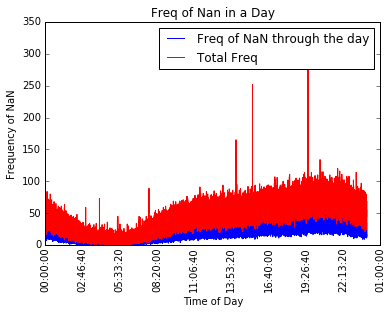

In [383]:


# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

plt.plot(uniquetime, frequencyofNaN, label='Freq of NaN through the day')
plt.plot(alluniquetime, totalFreq, color='r', label='Total Freq')
plt.ylabel('Frequency of NaN')
plt.xlabel('Time of Day')
plt.title('Freq of Nan in a Day')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

There is clearly rise in the overall Null Clicks towards the late evenings and nights. But this information alone isn't helpful since the overall throughput increases at the same time.. So we're going to dig a little deeper as to why we get these null values.  

When we analyse the query itself, we see that the unique queries take **46.8%** of the total queries that return null ClickURLs.

In [294]:
#No of unique null queries/No of null queries 
clickless.Query.unique().shape[0]/clickless.shape[0]

0.4681531223252465

But taking a closer look at the data, we see there are a few queries with spelling errors.

In [368]:
clickless.head(20)

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN
10,479,car sponsor decals,2006-03-03 23:28:59,NaN,NaN
11,479,car brand name decals,2006-03-03 23:29:35,NaN,NaN
12,479,brand name decals,2006-03-03 23:29:58,NaN,NaN
19,479,chicago radio annoucer whip,2006-03-04 22:16:07,NaN,NaN
20,479,chicago radio whip,2006-03-04 22:16:27,NaN,NaN
30,479,howard stern lawsuit,2006-03-08 00:14:55,NaN,NaN
32,479,opec,2006-03-09 09:19:29,NaN,NaN
40,479,wto history,2006-03-13 18:48:27,NaN,NaN


In [15]:
#Given the top choices, we're going to try to look at some patterns in common between the users 
#that used the most frequented query
#Linear reg wouldn't work because its very sensitive to outliers, which is common in modern data
#Noticed most mispelled/unclear queries don't get a click.

In [ ]:
plt.plot(uniquetime, frequencyofNaN, label='Freq of NaN through the day')
plt.plot(allTime, totalFreq, label='Freq of NaN through the day')
plt.ylabel('Frequency of NaN')
plt.xlabel('Time of Day')
plt.title('Freq of Nan in a Day')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()